In [1]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline
import numpy as np

from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_histogram

In [2]:
import random
N = 2
s = random.randint(0, 2**N) # the hidden integer 
print("As integer:", s)
s = "{}".format(bin(s)[2:])
print("As binary:", s)
nQubits = len(s)

As integer: 2
As binary: 10


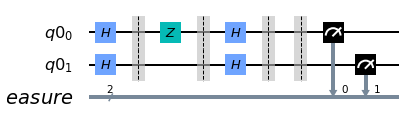

In [3]:
qr = QuantumRegister(nQubits)

bvCircuit = QuantumCircuit(qr)
barriers = True

for i in range(nQubits):
    bvCircuit.h(qr[i])
    
if barriers:
    bvCircuit.barrier()
    
for qbit in range(len(str(s))):
    if (s[qbit] == '1'):
        bvCircuit.z(qbit)

if barriers:
    bvCircuit.barrier()
        
for i in range(nQubits):
    bvCircuit.h(qr[i])
    
if barriers:
    bvCircuit.barrier()

bvCircuit.measure_all()

bvCircuit.draw(output='mpl', scale=0.5)

Hidden string: 10


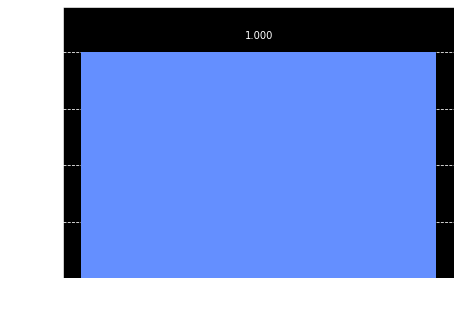

In [4]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(bvCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()

print("Hidden string:", s)
plot_histogram(answer)